In [1]:
from QuditsOnQubits import brisbane, torino, fidelity, create_ghz, create_graph_ghz, create_ame43
import igraph as ig
import numpy as np

In [2]:
ghz_circ, state_ghz = create_ghz()

In [3]:
bris = brisbane(ghz_circ)

In [4]:
#bris.draw('mpl', idle_wires=False)

In [5]:
fidelity(ghz_circ, bris)

0.8985440108480046

In [6]:
torino = torino(ghz_circ)

In [7]:
fidelity(ghz_circ, torino)

C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit\pulse\calibration_entries.py:337: UserWarning: Pulse calibration cannot be built and the entry is ignored: Instruction CZ90_u0 on channel u0 is not found in Qiskit namespace. This instruction cannot be deserialized..
  warnings.warn(
C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit\pulse\calibration_entries.py:337: UserWarning: Pulse calibration cannot be built and the entry is ignored: Instruction CZ90_u1 on channel u1 is not found in Qiskit namespace. This instruction cannot be deserialized..
  warnings.warn(
C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit\pulse\calibration_entries.py:337: UserWarning: Pulse calibration cannot be built and the entry is ignored: Instruction CZ90_u0 on channel u0 is not found in Qiskit namespace. This instruction cannot be deserialized..
  warnings.warn(
C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit\pulse\calibration_entries.py:337: UserWarning:

0.9198121318712994

In [3]:
g = ig.Graph(n=3, directed=False)

edges = [(0,1), (0,2)]
g.add_edges(edges)

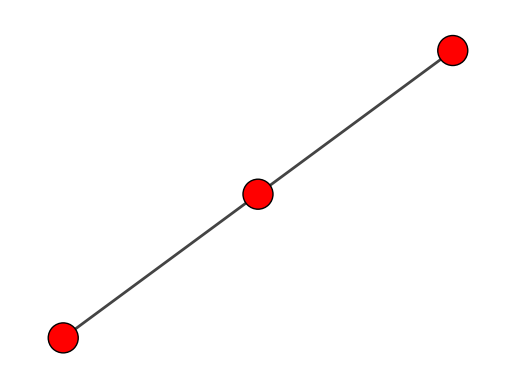

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ig.plot(g, target=ax)

In [5]:
ghz_test = create_graph_ghz(g)

In [6]:
from QuditsOnQubits import bell_operator
from qiskit import QuantumCircuit, qpy

for e in g.es:
    e["r"] = 1

bellexps, circs = bell_operator(g, ghz_circ)

InternalError: Error at src/graph/type_indexededgelist.c:1443: Cannot get edge ID, no such edge. -- Invalid value

In [7]:
bellexps

[np.float64(-0.49999999999999983),
 np.float64(-0.5000000000000002),
 np.float64(0.9999999999999999),
 np.float64(-0.5000000000000003),
 np.float64(0.9999999999999998),
 np.float64(-0.4999999999999993),
 np.float64(-0.500000000000001),
 np.float64(-0.49999999999999917),
 np.float64(0.9999999999999996)]

In [14]:
g2 = ig.Graph(n=3, directed=False, edges=[(0, 1), (1, 2), (2, 3), (3, 0), (3, 0)])
for e in g2.es:
    e["r"] = 1

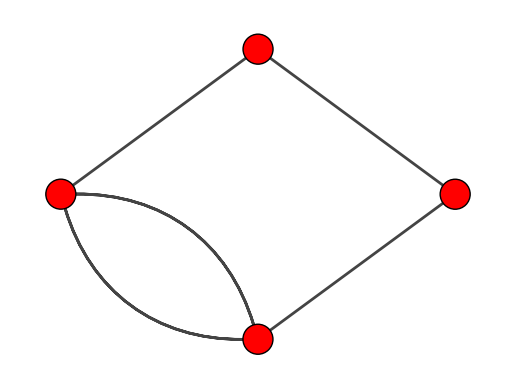

In [15]:
fig, ax = plt.subplots()
ig.plot(g2, target=ax)

In [17]:
ame43 = create_graph_ghz(g2)

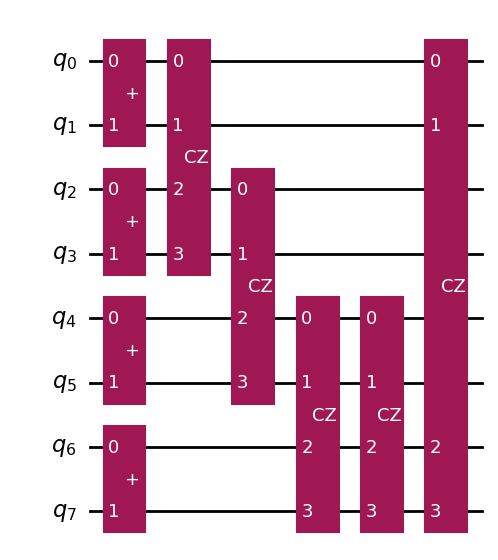

In [18]:
ame43.draw("mpl")

In [19]:
bellexps2, circs2 = bell_operator(g2, ame43)

I_Bell = 0.250000


In [ ]:
circs2[0].decompose().draw("mpl")

In [10]:
for i in stanSquare:
    i.draw("mpl")

In [24]:
g2 = ig.Graph(n=3, directed=False, edges=[(0, 1), (0, 2)])


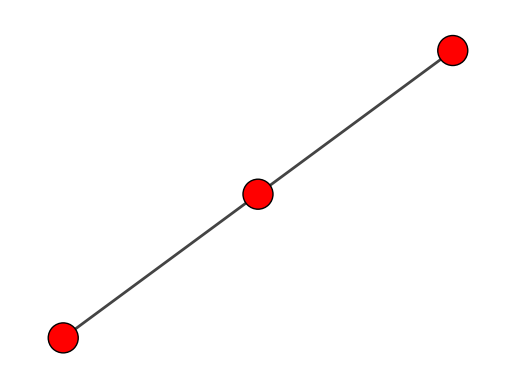

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ig.plot(g2, target=ax)

In [26]:
for e in g2.es:
    e["r"] = 1

In [28]:
ghz_bell = bell_operator(g2)

-----------------------------
0
X
[0, 1]
-----------------------------
-----------------------------
1
Z
[2, 3]
-----------------------------
-----------------------------
2
ZX
[4, 5]
-----------------------------
-----------------------------
0
X
[0, 1]
-----------------------------
-----------------------------
1
ZX
[2, 3]
-----------------------------
-----------------------------
2
ZX
[4, 5]
-----------------------------
-----------------------------
0
X
[0, 1]
-----------------------------
-----------------------------
1
ZXX
[2, 3]
-----------------------------
-----------------------------
2
ZX
[4, 5]
-----------------------------
-----------------------------
0
XZ
[0, 1]
-----------------------------
-----------------------------
1
Z
[2, 3]
-----------------------------
-----------------------------
2
ZX
[4, 5]
-----------------------------
-----------------------------
0
XZ
[0, 1]
-----------------------------
-----------------------------
1
ZX
[2, 3]
--------------------------

In [49]:
ghz_bell_circs = []

for i in ghz_bell:
    tempcirc = ghz_circ.copy()
    tempcirc.append(i, [0,1,2,3,4,5])
    tempcirc.measure_all()
    ghz_bell_circs.append(tempcirc)

In [ ]:
ghz_circ.draw('mpl')

In [ ]:
ghz_bell_circs[0].decompose().draw("mpl")

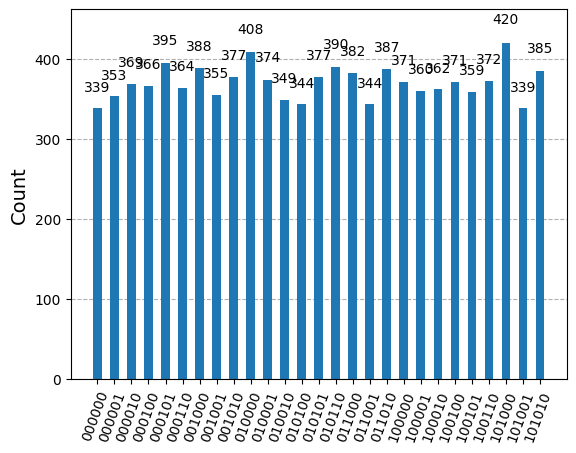

In [11]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

shots = 10000
sampler = StatevectorSampler()
job = sampler.run([circs[0]], shots = shots)
data_pub = job.result()[0].data
bitstrings = data_pub.meas.get_bitstrings()
counts = data_pub.meas.get_counts()
plot_histogram(counts)

In [20]:
keys = list(counts.keys())[0]

In [21]:
keys

'100101'

In [14]:
for i in range(0, len(keys), 2):
    print(f'{keys[i]}{keys[i+1]}')

10
01
01


In [15]:
import numpy as np

In [18]:
def exp_bell(counts, shots):
    oper = 0
    for i in list(counts.keys()):
        p = counts[i]/shots
        sum = 0
        for j in range(0, len(i), 2):
            if f'{keys[j]}{keys[j+1]}' == "00":
                sum += 0
            elif f'{keys[j]}{keys[j+1]}' == "01":
                sum += 1
            elif f'{keys[j]}{keys[j+1]}' == "10":
                sum += 2
        omega = np.exp(2*np.pi*1.j/3)
        f = pow(omega, sum)
        oper += p*f

    return oper

In [19]:
exp_bell(counts, shots)

np.complex128(-0.4999999999999992+0.866025403784439j)

In [58]:
from qiskit.result import QuasiDistribution

In [59]:
quasi_dist = QuasiDistribution({outcome: freq / shots for outcome, freq in counts.items()})

In [17]:
for i in stanLine:
    print(stanLine[i])

['X', 'XZ', 'XZZ']
['Z', 'ZX', 'ZXX']
['ZX']
['ZX']
['ZX']
['ZX']


In [18]:
import itertools

In [25]:
list(stanLine.values())

[['X', 'XZ', 'XZZ'], ['Z', 'ZX', 'ZXX'], ['ZX'], ['ZX'], ['ZX'], ['ZX']]

In [33]:
for combination in itertools.product(*list(stanLine.values())):
    print(combination)
    for j in range(len(combination)):
        print(j)
        print(combination[j])


('X', 'Z', 'ZX', 'ZX', 'ZX', 'ZX')
0
X
1
Z
2
ZX
3
ZX
4
ZX
5
ZX
('X', 'ZX', 'ZX', 'ZX', 'ZX', 'ZX')
0
X
1
ZX
2
ZX
3
ZX
4
ZX
5
ZX
('X', 'ZXX', 'ZX', 'ZX', 'ZX', 'ZX')
0
X
1
ZXX
2
ZX
3
ZX
4
ZX
5
ZX
('XZ', 'Z', 'ZX', 'ZX', 'ZX', 'ZX')
0
XZ
1
Z
2
ZX
3
ZX
4
ZX
5
ZX
('XZ', 'ZX', 'ZX', 'ZX', 'ZX', 'ZX')
0
XZ
1
ZX
2
ZX
3
ZX
4
ZX
5
ZX
('XZ', 'ZXX', 'ZX', 'ZX', 'ZX', 'ZX')
0
XZ
1
ZXX
2
ZX
3
ZX
4
ZX
5
ZX
('XZZ', 'Z', 'ZX', 'ZX', 'ZX', 'ZX')
0
XZZ
1
Z
2
ZX
3
ZX
4
ZX
5
ZX
('XZZ', 'ZX', 'ZX', 'ZX', 'ZX', 'ZX')
0
XZZ
1
ZX
2
ZX
3
ZX
4
ZX
5
ZX
('XZZ', 'ZXX', 'ZX', 'ZX', 'ZX', 'ZX')
0
XZZ
1
ZXX
2
ZX
3
ZX
4
ZX
5
ZX


In [8]:
squareState = square_graph.circuit

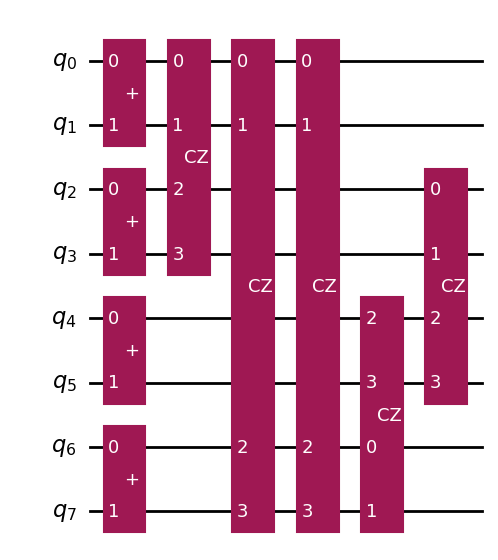

In [9]:
squareState.draw('mpl')